In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
!pwd

/Users/lockepatton/Desktop/2020-ASTR100/Students/LockePatton


In [5]:
!ls

HW1.ipynb       Untitled.ipynb  newfile.txt     thisisafile.txt


In [16]:
dir_ = "../../Notes/2020_02_04_Astropy_and_Fits/data/" 

In [17]:
!ls $dir_

PTF_201307021787_c_p_scie_t041723_u016616794_f02_p003486_c11.ctlg.gz
PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [25]:
imageName = 'PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits'

print(dir_+imageName)

f = fits.open(dir_+imageName)
data = f[0].data  #This is the image array

../../Notes/2020_02_04_Astropy_and_Fits/data/PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11.fits


In [26]:
print(f[0].data)

[[ 950.1195   828.3512   794.58575 ...  882.8172   851.57056  918.08606]
 [1314.2125  1029.75    1274.6445  ... 1307.4128  1330.3835  1520.352  ]
 [1370.7009  1161.3257  1184.0637  ... 1300.1604  1288.3566  1326.317  ]
 ...
 [1715.98    1341.2823  1293.5846  ... 1144.3986  1093.1195  1438.387  ]
 [1744.9568  1337.1195  1247.6532  ... 1150.5416  1123.4219  1512.558  ]
 [1762.8173  1284.9335  1317.8778  ... 1133.846   1113.6544  1570.3055 ]]


In [ ]:
plt.figure(figsize=(10,10))

mean = np.mean(data)
median = np.median(data)
sigma = np.std(data)

#minimum value plotted
vmin = mean - .1 * sigma
    
#maximum value plotted
vmax = mean + .1 * sigma

vmin = 1250
vmax = 1450

plt.imshow(data[2400:2600,500:750], vmin=vmin, vmax=vmax, cmap='Blues')
plt.colorbar()

(500, 750)

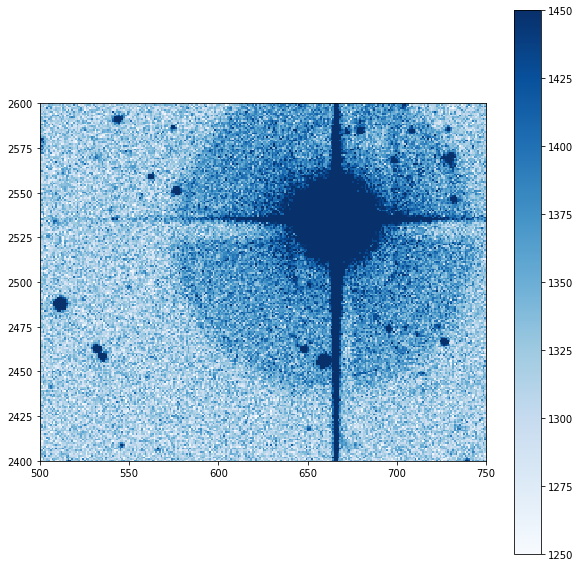

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=vmin, vmax=vmax, cmap='Blues')
plt.colorbar()

# plt.ylim(2400,2600)
# plt.xlim(500,750)

In [49]:
header = f[0].header

In [50]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

In [55]:
from astropy import wcs

In [59]:
w = wcs.WCS(header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [60]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 217.309490953823  16.6581466832508  
CRPIX : 1497.193  609.3031  
CD1_1 CD1_2  : 0.000280377484830748  -1.71606271442079e-06  
CD2_1 CD2_2  : -1.61073877029747e-06  -0.000280943199913645  
NAXIS : 2048  4096

$y=mx+b$

HW 1


In [69]:
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

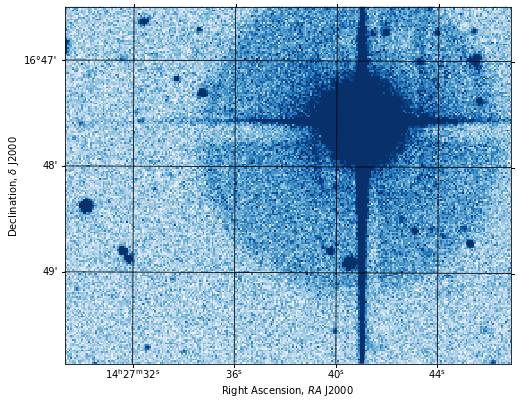

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=w)

ax.set_xlabel('Right Ascension, $RA$ J2000')
ax.set_ylabel('Declination, $\delta$ J2000')

ax.imshow(data[2400:2600,500:750], vmin=vmin, vmax=vmax, cmap='Blues')
ax.grid(color='black')

In [70]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [73]:
c = SkyCoord('14h27m42s', '+16d47m30s')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (216.925, 16.79166667)>

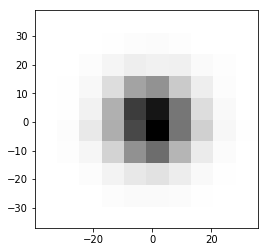

In [92]:
N = 10000
x = np.random.normal(0, 10, N)
y = np.random.normal(0, 10, N)

plt.figure(figsize=(4,4))
plt.hist2d(x, y, bins=10, cmap='Greys');

In [99]:
x = np.random.normal(0, 10, (2,1000))
# y = np.random.normal(0, 10, N)

In [100]:
x.shape

(2, 1000)

In [101]:
x

array([[  7.04955982,   5.20543952, -17.1200758 , ...,   9.11940193,
          6.73745368, -13.2378857 ],
       [ 12.76120686,  18.03045129,  -3.26196351, ..., -16.69192258,
         -6.18894676,  -1.39919482]])